In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_datagen=ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,#tilts the image
    zoom_range=0.2,horizontal_flip=True
    )

training_set=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/ASS/plant/Train/Train',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

Found 1322 images belonging to 3 classes.


In [5]:
training_set.class_indices

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}

In [6]:
test_datagen=ImageDataGenerator(
rescale=1./255)

test_set=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/ASS/plant/Test/Test',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

Found 150 images belonging to 3 classes.


In [7]:
test_set.class_indices

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}

In [23]:
from tensorflow import keras
cnn=keras.Sequential()
#1 layer
cnn.add(keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#2 layer
cnn.add(keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#3 layer
cnn.add(keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(256,activation='relu'))
cnn.add(keras.layers.Dropout(0.2))
cnn.add(keras.layers.Dense(128,activation='relu'))
cnn.add(keras.layers.Dropout(0.2))
cnn.add(keras.layers.Dense(256,activation='relu'))
cnn.add(keras.layers.Dropout(0.2))
cnn.add(keras.layers.Dense(128,activation='relu'))
cnn.add(keras.layers.Dense(3,activation='softmax'))

In [24]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 32)         

In [25]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [27]:
model_history=cnn.fit(x=training_set,validation_data=test_set,epochs=25)

Epoch 1/25
42/42 [==============================] - 93s 2s/step - loss: 0.9222 - accuracy: 0.5174 - val_loss: 0.8355 - val_accuracy: 0.5400
Epoch 2/25
42/42 [==============================] - 91s 2s/step - loss: 0.7326 - accuracy: 0.6301 - val_loss: 0.7102 - val_accuracy: 0.6133
Epoch 3/25
42/42 [==============================] - 90s 2s/step - loss: 0.6416 - accuracy: 0.6884 - val_loss: 0.6953 - val_accuracy: 0.7133
Epoch 4/25
42/42 [==============================] - 88s 2s/step - loss: 0.5694 - accuracy: 0.7632 - val_loss: 0.5403 - val_accuracy: 0.7733
Epoch 5/25
42/42 [==============================] - 90s 2s/step - loss: 0.4387 - accuracy: 0.8389 - val_loss: 0.4953 - val_accuracy: 0.8133
Epoch 6/25
42/42 [==============================] - 89s 2s/step - loss: 0.4042 - accuracy: 0.8525 - val_loss: 0.4278 - val_accuracy: 0.8333
Epoch 7/25
42/42 [==============================] - 89s 2s/step - loss: 0.3166 - accuracy: 0.8828 - val_loss: 0.5277 - val_accuracy: 0.8400
Epoch 8/25
42/42 [==

<Axes: >

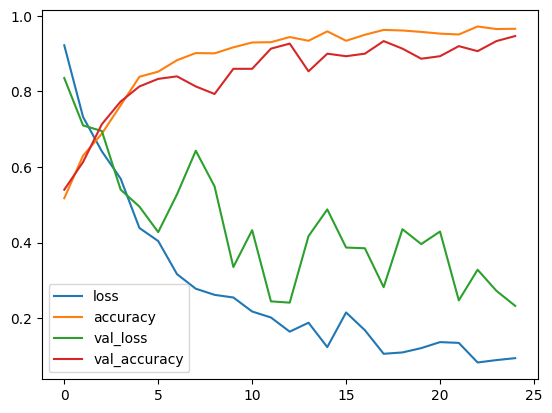

In [28]:
import pandas as pd
pd.DataFrame(model_history.history).plot()

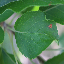

In [29]:
from keras.utils import load_img,img_to_array
test=load_img('/content/drive/MyDrive/ASS/plant/Train/Train/Rust/807947b90eb77856.jpg',target_size=(64,64))
test

In [30]:
import numpy as np
test=img_to_array(test)
test=np.expand_dims(test,axis=0)
test.shape

(1, 64, 64, 3)

In [31]:
result=cnn.predict(test)

1/1 [==============================] - 0s 100ms/step


In [32]:
result

array([[1., 0., 0.]], dtype=float32)

In [ ]:
cnn.save('')